In [3]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [4]:
IMAGE_SIZE = 244
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [5]:
Dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Disease_Dataset",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE)

Found 8000 files belonging to 5 classes.


In [6]:
class_names = Dataset.class_names
class_names

['ALL TEST', 'AML TEST', 'CLL TEST', 'CML TEST', 'Normal cells dataset']

In [7]:
len(Dataset)     #250*32

250

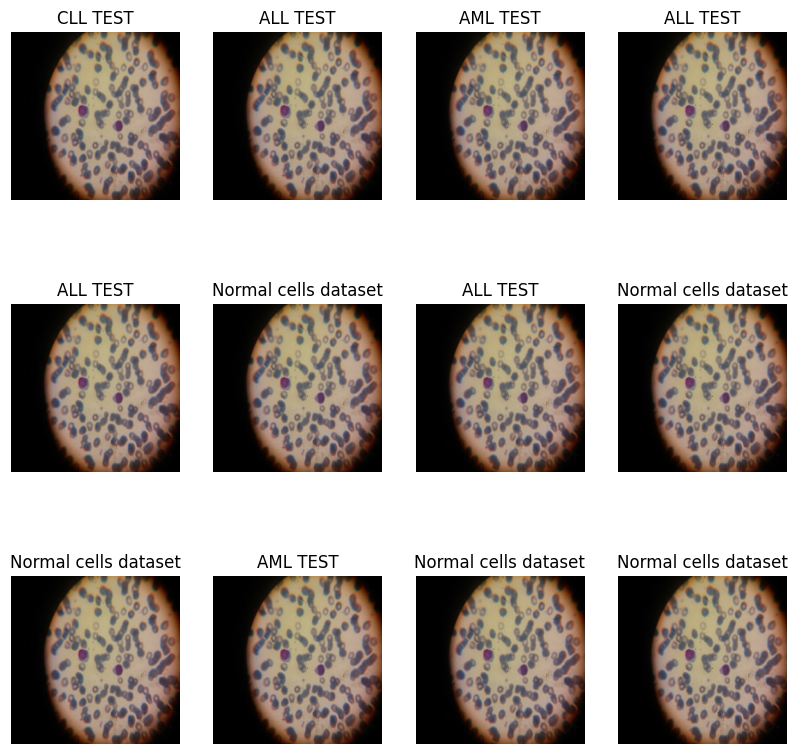

In [8]:
plt.figure(figsize = (10,10))
for image_batch, label_batch in Dataset.take(1):
    #print(image_batch[0].shape)
    #print(label_batch.numpy())

    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[0].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
    

In [9]:
80% ==> Training
20% ==> 10% validation, 10% test

SyntaxError: invalid syntax (2894956837.py, line 1)

In [ ]:
train_size = 0.8
len(Dataset)*train_size

In [20]:
train_ds = Dataset.take(200)
len(train_ds)

200

In [21]:
test_ds = Dataset.skip(200)
len(test_ds)

50

In [ ]:
val_size = 0.1
len(Dataset)*val_size

In [22]:
val_ds = test_ds.take(25)
len(val_ds)

25

In [23]:
test_ds = test_ds.skip(25)
len(test_ds)

25

In [ ]:
# Python function to integrate all of the above
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(Dataset)

In [ ]:
len(train_ds)

In [ ]:
len(val_ds)

In [ ]:
len(test_ds)

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [14]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])                       

In [15]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

# Building & Training CNN Model

In [16]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 5
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation = "relu", input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation = "relu"),
    layers.Dense(n_classes, activation = "softmax")
])


C:\Users\91863\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [80]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)            │ (None, 244, 244, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_2 (Sequential)            │ (None, 244, 244, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 242, 242, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 121, 121, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 119, 119, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 59, 59, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 57, 57, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 514,769 (1.96 MB)

 Trainable params: 171,589 (670.27 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 343,180 (1.31 MB)

In [18]:
model.compile(
    optimizer = "adam",
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

In [24]:
history = model.fit(
    train_ds,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = val_ds
)

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 191s 924ms/step - accuracy: 0.6513 - loss: 0.7921 - val_accuracy: 0.7337 - val_loss: 0.5623
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 174s 869ms/step - accuracy: 0.7353 - loss: 0.6043 - val_accuracy: 0.7225 - val_loss: 0.5762
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 174s 869ms/step - accuracy: 0.7466 - loss: 0.5730 - val_accuracy: 0.7825 - val_loss: 0.5182
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 179s 892ms/step - accuracy: 0.7678 - loss: 0.5402 - val_accuracy: 0.8012 - val_loss: 0.4494
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 182s 909ms/step - accuracy: 0.7858 - loss: 0.5039 - val_accuracy: 0.7725 - val_loss: 0.5183
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 178s 890ms/step - accuracy: 0.7997 - loss: 0.4771 - val_accuracy: 0.8200 - val_loss: 0.4068
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 723s 4s/step - accuracy: 0.8200 - loss: 0.4351 - val_accuracy: 0.8275 - val_loss: 0.3813
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 748s 4s/step - accuracy: 0.8238 - loss:

In [25]:
scores = model.evaluate(test_ds)

25/25 ━━━━━━━━━━━━━━━━━━━━ 31s 255ms/step - accuracy: 0.9663 - loss: 0.0771


In [26]:
scores

[0.07714486867189407, 0.9662500023841858]

In [27]:
history

In [28]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 200}

In [29]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

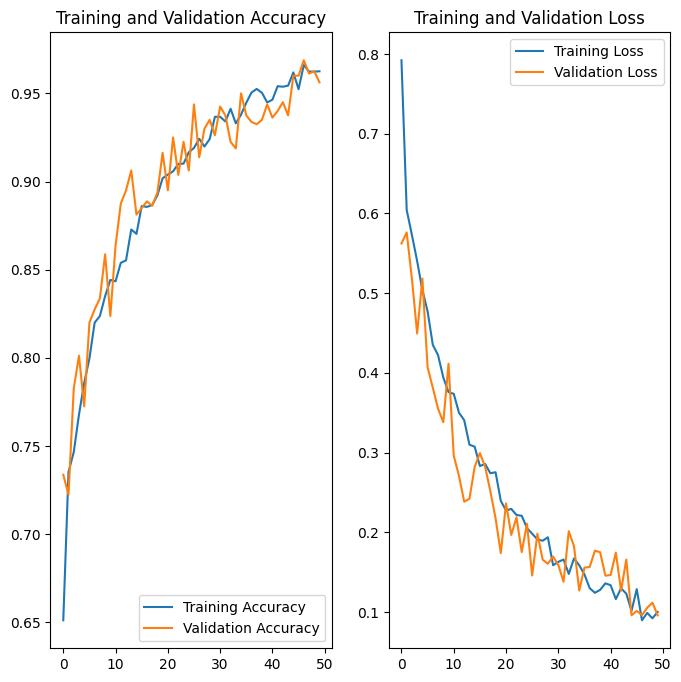

In [39]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label = 'Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label = 'Training Loss')
plt.plot(range(EPOCHS), val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')
plt.show()

First image to predict
actual label : Normal cells dataset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
predicted label : Normal cells dataset


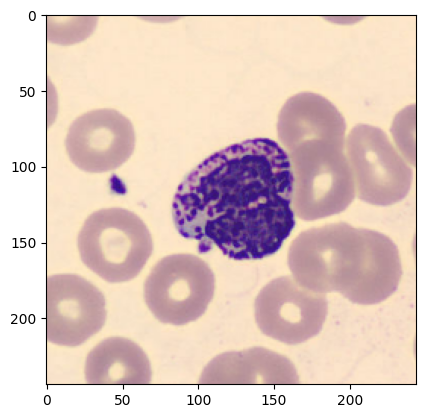

In [49]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):

   first_image = images_batch[0].numpy().astype('uint8')
   first_label = labels_batch[0]

   print("First image to predict")
   plt.imshow(first_image)
   print("actual label :", class_names[first_label])

   batch_prediction = model.predict(images_batch)
   print("predicted label :",class_names[np.argmax(batch_prediction[0])])

In [57]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])),2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


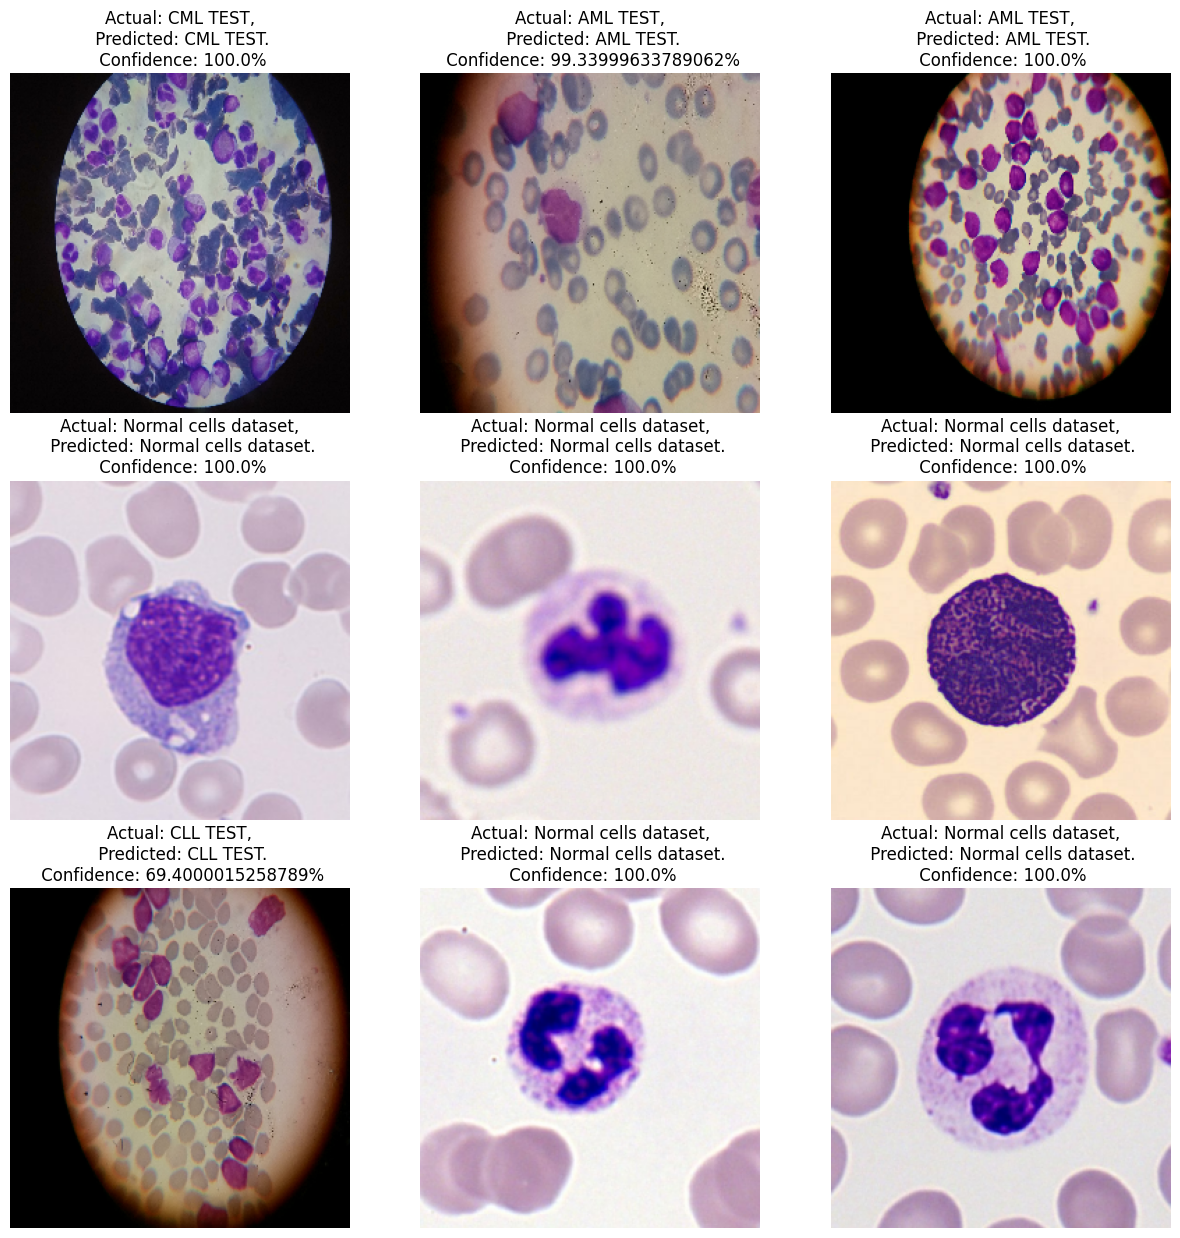

In [79]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        plt.axis('off')

In [78]:
import os
model_version = max([int(i) for i in os.listdir("C:/Users/91863/Documents/Leukemia_Disease/Models") + [0]]) + 1
model.export(f"C:/Users/91863/Documents/Leukemia_Disease/Models/{model_version}")

INFO:tensorflow:Assets written to: C:/Users/91863/Documents/Leukemia_Disease/Models/2\assets


INFO:tensorflow:Assets written to: C:/Users/91863/Documents/Leukemia_Disease/Models/2\assets


Saved artifact at 'C:/Users/91863/Documents/Leukemia_Disease/Models/2'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 244, 244, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  2938711727504: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2938711730000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2938711730192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2938711733072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2938711733456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2938711733648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2938711732112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2938711734224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2938711734416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2938711734800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  